# Kernels and Beyond

Besides the demo for our XLoKR paper, we also want dive deeper into the concept kernels

In [1]:
from kernel_functions import *

In [2]:
delete_timestamped_subfolders(directory="output")

Deleted output/20230924_015510
Deleted output/20230924_015511


Let's go back to the graph $G = (V, E)$ 

In [3]:
%%file files/plain_graph.dlv

edge(a,b).
edge(t,b).
edge(b,c).
edge(c,d).
edge(b,e).
edge(d,e).
edge(b,f).
edge(s,g).
edge(f,h).
edge(e,i).
edge(i,j).
edge(i,k).
edge(i,l).
edge(e,m).
edge(o,m).
edge(n,m).
edge(j,n).
edge(i,o).
edge(m,o).
edge(g,q).
edge(h,q).
edge(c,q).
edge(e,s).
edge(f,s).
edge(s,t).
edge(t,u).
edge(b,v).
edge(u,v).
edge(b,w).
edge(d,x).
edge(b,y).
edge(c,z).

Overwriting files/plain_graph.dlv


we already know that the graph for kernel calculation will be the same as plain graph. So we can directly reason on the plain graph to identify the kernels.

In [4]:
%%file files/cal_kernel.dlv

%c represents complements of kernels
%k stands for kernel
%pk means possibly in or out of kernel

% Positions
pos(X) :- edge(X,_).
pos(X) :- edge(_,X).

% Kernel
c(X) :- edge(X,Y),k(Y).
k(X) :- pos(X), not c(X).
pk(X) :- pos(X), not c(X), not k(X).

Overwriting files/cal_kernel.dlv


### Well-Founded Semantics

As illustrated in the demo session, we can get the status of nodes  with well founded semantics 
- k: kernel
- c: completements_of_kernels
- pk: possibly_in_or_out_of_kernel

In [5]:
cmd_solve = 'dlv files/plain_graph.dlv files/cal_kernel.dlv -wf'
kernel_nodes_status = get_nodes_status(run_command(cmd_solve),node_types=["c","k","pk"])

In [6]:
kernel_nodes_status

{'c': ['b', 'c', 'd', 's', 'g', 'h', 'i', 'u'],
 'k': ['a', 't', 'f', 'k', 'l', 'q', 'v', 'w', 'x', 'y', 'z'],
 'pk': ['e', 'j', 'm', 'o', 'n']}

### Stable Model Semantics

What about stable models, can we calculate the number of possible sets of kernels?

In [7]:
cmd_solve = 'dlv files/plain_graph.dlv files/cal_kernel.dlv -filter="k"'
print(run_command(cmd_solve))

DLV [build BEN/Dec 17 2012   gcc 4.6.1]

{k(a), k(t), k(f), k(j), k(k), k(l), k(m), k(q), k(v), k(w), k(x), k(y), k(z)}

{k(a), k(t), k(e), k(f), k(k), k(l), k(o), k(n), k(q), k(v), k(w), k(x), k(y), k(z)}



### Number of Kernels

In [8]:
count_sets(run_command(cmd_solve))

2

### Visualize All Kernels

From the example above, we can get two set of possible kernels.Let's visualize it

In [9]:
pw_dict=extract_sets(run_command(cmd_solve))

In [10]:
display_colored_graphs("files/plain_graph.dlv",pw_dict)

interactive(children=(IntSlider(value=1, description='Slider', max=2, min=1), Output()), _dom_classes=('widget…

Not enough PNG files in the folder for the desired grid.


# Use Case: 2<sup>K</sup> Example

As we experienced the calculation process, let's reproduce the example illustrated in the Fraenkel's paper


![](./img/figure.png)

In [11]:
%%file files/k_graph.dlv

edge(a,b).
edge(b,a).
edge(c,d).
edge(d,c).
edge(f,e).
edge(e,f).
edge(m,n).
edge(n,m).
edge(i,b).
edge(i,c).
edge(i,e).
edge(i,m).

Overwriting files/k_graph.dlv


In [12]:
cmd_cycle = 'dlv files/k_graph.dlv files/cycle.dlv -filter="cycle"'
count_cycles(run_command(cmd_cycle))

4

In [13]:
%%file files/cycle.dlv

cycle(X,Y):- edge(X,Y), edge(Y,X), X>Y.

Overwriting files/cycle.dlv


In [14]:
cmd_solve = 'dlv files/k_graph.dlv files/cal_kernel.dlv -filter="k"'
count_sets(run_command(cmd_solve))

16

In [15]:
pw_dict=extract_sets(run_command(cmd_solve))

interactive(children=(IntSlider(value=1, description='Slider', max=16, min=1), Output()), _dom_classes=('widge…

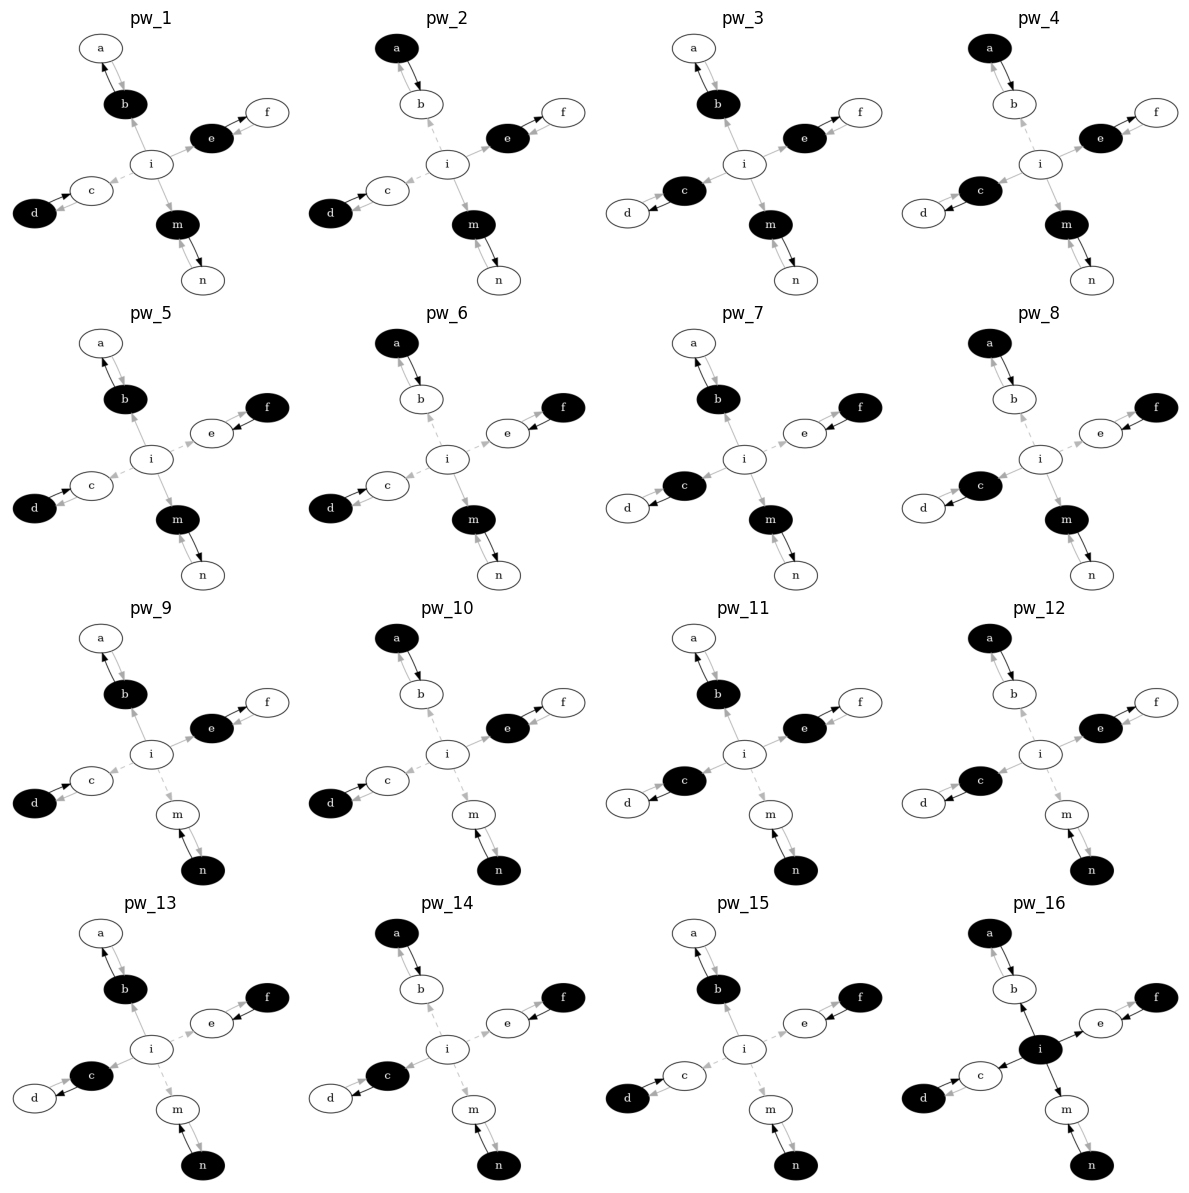

In [16]:
display_colored_graphs("files/k_graph.dlv",pw_dict, layout="neato")